<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    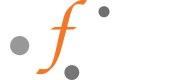
</div>

# Adding Time-Dependence to the Infinite Well

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 15 min</li>
<li><strong>Exercises:</strong> 0 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>How do we account for the time-dependence of the system? </li>
<li>How can I visualise these time-dependent solutions? </li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Explore how the wavefunctions of the infinite well vary with time.</li>
<li>Gain a basic understanding of how we can produce animations in Python</li>
</ul>
</div>

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-Import-Necessary-Libraries%0A"><i class="fa fa-info-circle"></i> Import Necessary Libraries
</h3>
    <p>Alongside the standard <code>numpy</code> and <code>matplotlib.plot</code> libraries that you have used, you will also need to import the <code>FuncAnimation</code> library for this lesson.</p>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Time-Dependence

In the previous lesson, we were able to convert the time-dependent Schrödinger equation into its time-independent form by using the separation of variables method. This involved decomposing the wavefunction of the system into two separate functions, which were each a function of either position of time only:

$$ 
\Psi(x,t) = \psi(x)\phi(t) \ .
\tag{1}
$$

Doing this allowed us to decompose the Schrödinger equation into two separable equations in $x$ and $t$ respectively. The equation in $x$ was the time-independent Schrödinger equation, and by solving this we found $\psi(x)$. In order to find our time-dependent function, $\phi(t)$, we must therefore solve this differential equation in time. This equation is

$$
\frac{d\phi}{dt} = - \frac{iE}{\hbar}\phi \ ,
\tag{2}
$$

where $E$ is the energy of the system. Recall from the previous lesson that this is given by

$$ 
E_n = \frac{n^2\pi^2\hbar^2}{2mL^2} \ . 
\tag{3}
$$

Equation $3$ is trivial to solve (simply multiply through by $dt$ and integrate). The solution is

$$
\phi(t) = e^{-iEt/\hbar} \ .
\tag{4}
$$

Thus the solution to the time-dependent Schrödinger equation for the infinite potential well is the product $\psi$ and $\phi$. However, there are an infinite number of solutions (eigenfunctions) to the time-independent Schrödinger equation, each with an associated energy eigenvalue $E_n$. This means that there is a different wavefunction for each allowed energy, and an infinite number of wavefunctions:

$$
\Phi_{n}(x, t) = \psi_n(x)e^{-iE_nt/\hbar} \ .
\tag{5}
$$

Let's explore how adding on this time-dependent term - equation $(3)$ - to our eigenfunctions for the infinite well affects the wavefunction.

## Visualising the Time-Dependence of the System

Open a Jupyter notebook and import the necessary libraries, which can be found at the top of this page. Now, copy and paste the two functions `psi()` and `eigenfunctions()` which you used in the previous lesson into your notebook. 

We are going to need to create a few global variables again this time:

- Set `L = 10**(-10)` and `length = 1000` as you did in the previous lesson.
- As we are going to need to calculate the energy of the n'th eigenstate for our time-dependent term, we need to set `hbar = 1.05 * 10**(-34)` and `m =  9.11 * 10**(-31)` (the mass of an electron).
- Finally, lets see the effect of time dependence for say, n = 4. As we are going to declare this variable in the global scope like the others, we can't use `n` as our variable name: this is used locally in some of the functions already. Lets name this variable`num` instead. Set `num = 4`.

In [2]:
L = 10**(-10)
length = 1000
hbar = 1.05 * 10**(-34) 
m =  9.11 * 10**(-31) 
num = 4

energy = num**2 * np.pi**2 *  hbar**2 / (2 * m * L**2)

def psi(n, x):
    """
    Computes the value of the n'th wavefunction at a position x, using the analytic solution 
    to the Schrodinger equation for an infinite potential well.
    
    Returns:
        float
            The value of the wavefunction at x
        
    Parameters:
        x : float
            The x coordinate of the system
        
        n : integer
            Describes which state the wavefunction is in
    """
    
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)


def eigenfunction(n, length):
    """
    Fill an array with the y-values of the n'th eigenfunction in an infinite potential well
    
    Returns: 
        wav : array
            An array containing the y-avlues
        
    Parameters:
        l : integer
            determines the length of the outputted array (array is 4 times this length)
            
        n : integer
            describes the state of the wavefunction
    """
    
    length = int(length) # making sure that length is an integer
    
    wav = np.empty(length) # creating an empty array 
    
    for x in np.arange(0, length):
        wav[x] = psi(n, x * (L / length)) 
        
    return wav

Below, I have written a function named `animate()`. Later on, this function will be called by the FuncAnimation module that we imported, and it will plot the wavefunction objects for the value of t that is passed to it. Copy and paste this function into your Jupyter notebook.

In [3]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib) each time this is called, 
    it will replot the plotting objects with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    # create our real and imaginary wavefunction objects. Note that I have multiplied t by 10^17 in the exponential
    # to reduce the frequency of oscillations in the animation to a reasonable speed
    f = eigenfunction(num, length) * np.exp(-1j * energy* (10**17) * t) 
    
    wave_real.set_ydata(f.real)
    wave_imag.set_ydata(f.imag)
    prob.set_ydata(f * conj(f))

In order to get our animation working in the notebook, we will need to use a bit of behind the scenes magic. Write `%matplotlib notebook` into the first line of a new cell. This command performs the necessary setup for out notebook to be able to handle 'content-rich' outputs from a cell, such as the animation that we are about to produce. Make sure that you do the rest of these steps IN THE SAME CELL as the `%matplotlib notebook` command.

The next few lines of code create an array of x-values for plotting and set up our plots. 

After this, I have written a function called `init()`. This function is called by the `FuncAnimation` module at the bottom of the cell and serves to intialise the plots, dealing with formatting and returning to `FuncAnimation` the names of the objects in `animate()` that are going to be plotted during the animation.

Finally, we need to tell `FuncAnimation` what values of t it should pass to `animate()`. This is done by passing it an array of t-values.

Copy and paste this code below into your workbook and execute the cell.

<IPython.core.display.Javascript object>


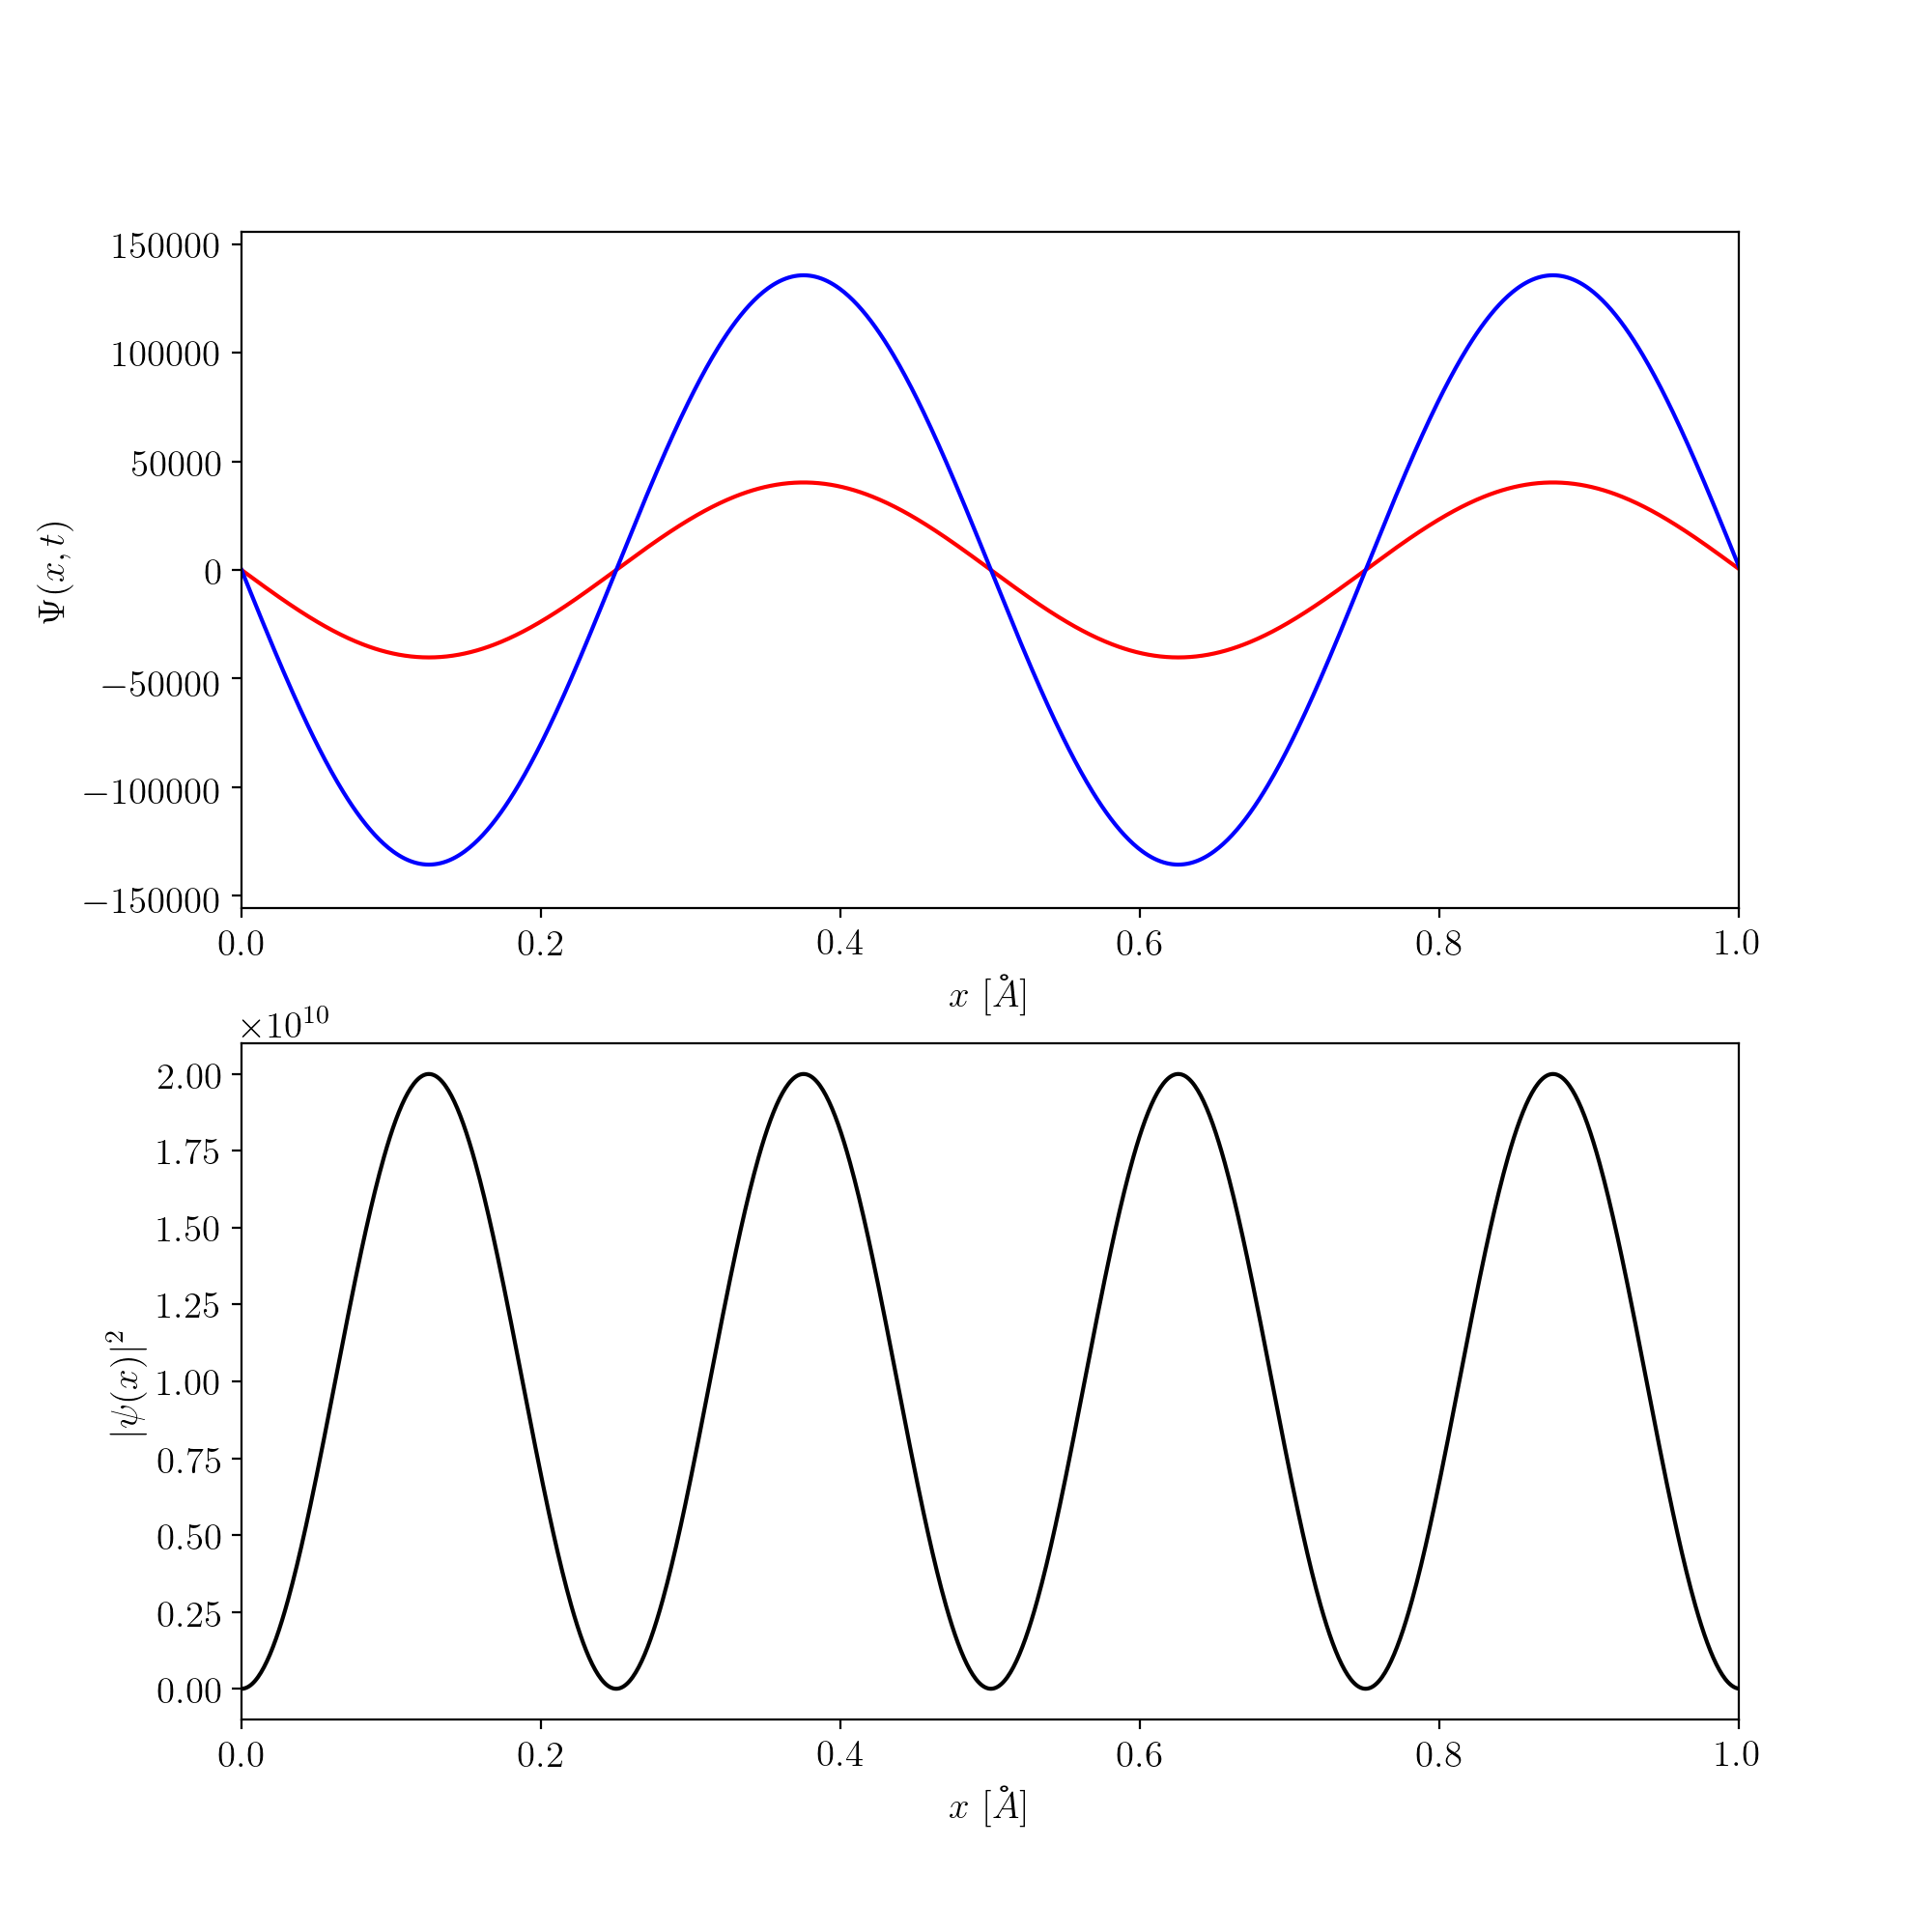

In [5]:
# required to display animated plots
%matplotlib notebook



# array of x values for plotting
xvals = np.linspace(0, 1, length)

# create figure and axes object
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10)) 

# draw the first frame of the animation on our plots
wave_real, = ax1.plot(xvals, eigenfunction(num, length),'-r') 
wave_imag, = ax1.plot(xvals, eigenfunction(num, length),'-b') 
prob, = ax2.plot(xvals, eigenfunction(num, length)**2, '-k') 




def init():
    """
    initialize the figure object 
    
    Returns:
        wave_real, wave_imag, prob : the objects that will appear on our plots and be called by the animate function
    
    """

    plt.rcParams.update({'font.size': 14})
    plt.rc('text', usetex=True) 
    ax1.set_xlabel(r'$x \ [\AA ]$')
    ax1.set_ylabel(r'$\Psi(x, t)$')
    ax2.set_xlabel(r'$x \ [\AA ]$')
    ax2.set_ylabel(r'$|\psi(x)|^2$')
    ax1.set_xlim(0, 1)
    ax2.set_xlim(0, 1)

    return wave_real, wave_imag, prob



# the FuncAnimation function iterates through our animate function using the steps array
step = 0.01 # stepsize  
steps = np.arange(0, 200, step)



# our animation. blit=True means only the pixels that change are re-plotted, and interval is the time interval
# in milliseconds between frames of the animation
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=25, blit=True) 

plt.show()

Congratulations! You should have a working animation! 

So what does it show? On the top plot we have the real (red) and imaginary (blue) parts of the wavefunction. You can see that while this clearly relates to the $n = 4$ eigenfunction, the inclusion of the time-dependent term has caused the wavefunction to oscillate! 

You may have heard these wavefunctions being described as *stationary states* of the system. Why is this, if the wavefunction clearly oscillates? The answer lies in the fact that the probability density of a particle does **not** vary with time, as can be seen from the second plot.

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Stationary-States%0A"><i class="fa fa-pencil-square-o"></i> Stationary States
</h3>
    <p>Can you prove that, for a system whose potential is constant in time, all wavefunctions of that system are stationary states?</p>
</div>

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Key-Points%3A%0A"><i class="fa fa-key"></i> Key Points:
</h3>
    <ul>
<li>Factoring in time-dependence causes the wavefunction of the system to oscillate.</li>
<li>These wavefunctions are still known as stationary states because their associated probability distributions are constant in time.</li>
<li>Python and Jupyter notebooks can be used to produce content-rich outputs that go beyond static line plots. </li>
</ul>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./01_ipw_tise.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./03_ipw_PT_energy.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>